<a href="https://colab.research.google.com/github/RaghavSrivastava25/SpamSMSClassifier/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
engine='python'
import pandas as pd
messages = pd.read_csv('SMSSpamCollection', sep='/t', names=["label", "message"])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [22]:
messages

,label,message
0,"ham\tGo until jurong point, crazy.. Available ...",None
1,ham\tOk lar... Joking wif u oni...,None
2,spam\tFree entry in 2 a wkly comp to win FA Cu...,None
3,ham\tU dun say so early hor... U c already the...,None
4,"ham\tNah I don't think he goes to usf, he live...",None
...,...,...
5569,spam\tThis is the 2nd time we have tried 2 con...,None
5570,ham\tWill ü b going to esplanade fr home?,None
5571,"ham\tPity, * was in mood for that. So...any ot...",None
5572,ham\tThe guy did some bitching but I acted lik...,None


In [23]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [35]:
ps = PorterStemmer()
wnl = WordNetLemmatizer()
corpus = []

In [33]:
messages['message']=messages['message'].apply(str)

In [37]:
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
tv = TfidfVectorizer()
X1 = tv.fit_transform(corpus).toarray()

In [94]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
cv = CountVectorizer()
X1 = cv.fit_transform(corpus).toarray()

In [96]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.20, random_state = 1234)

In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [102]:
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = SVC()
clf4 = MultinomialNB()
vclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3), ('mnb', clf4)], voting='hard')
vclf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('svc', SVC()), ('mnb', MultinomialNB())])

In [103]:
print(vclf.score(X_train, y_train))
print(vclf.score(X_test, y_test))

0.999775734469612
1.0


In [104]:
y_pred = vclf.predict(X_test)

In [105]:
print(accuracy_score(y_test, y_pred))

1.0


In [106]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


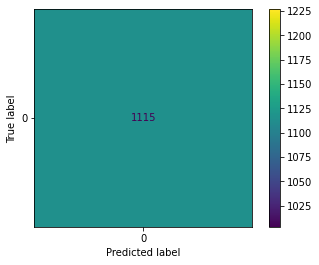

In [107]:
plot_confusion_matrix(vclf, X_test, y_test)  
plt.show()

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

